In [58]:
#Funciones para carga de menu

def cargarMenu():
        opcion = int(input("""Ingrese la opcion a analizar:
        4-.Acompañamientos
        35.-Visita  a cliente
        0 - Salir\n """))
        
        #Falta validacion de opcion incorrecta aqui
        if opcion != 0:
            mes = input("Ingrese el mes a analizar")
            regla = int(input("Ingrese la regla de negocio\n"))
            return opcion, mes, regla
        
        return opcion,"",""


def subMenu():
# hay que hacer una validacion para opcion invalida    
    
    print("Seleccione la opcion a analizar")
    return int(input("""1.- Rutas/clientes
2.- Mando Medio\n"""))   

In [71]:
#Nomenclatura y definiciones 
# MM - Mando Medio =supervisores de rutas
# ReglaNegocio = Cantidad de visitas a clientes o acompañamiento a ruta que se deben realizar como base al mes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class ModeloVisita:
    """Clase que representa a un modelo de visita"""
    
    key = "routeSchedule"  # Clientes/Rutas = [routeSchedule] | MandoMedio = [employee] 
    mes = "Agosto"
    reglaNegocio = 8
    tipoVisita   = 4   #   4.-Acompañamiento ruta | 35.-Visita  a cliente
    tipoAnalisis = 1   #   1.- valorAnalizado < reglaNegocio |  valorAnalizado >= reglaNegocio 
                       #   2.- valorAnalizado(MM) < reglaNegocio | valorAnalizado(MM) >= reglaNegocio
    
    
    #Constructor
    #def __init__ (self, key, mes, reglaNegocio , tipoVisita, tipoAnalisis):
    #def __init__ (self):
        #self.key = key
        #self.mes = mes 
        #self.reglaNegocio = reglaNegocio
        #self.tipoVisita = tipoVisita
        #self.tipoAnalisis = tipoAnalisis
        
    
    #checar si podemos dejar la ruta en c:
    def cargarArchivo(self):
        return pd.read_csv("C:\\Users\\juayala\\Documents\\CursoPython\\schedules" + str(self.tipoVisita) + self.mes + ".csv")
    
    
    def analizar(self, data):
        #Menos visitas
        dataGraficaBarrasMenor = data[data["idSchedul"] < int(self.reglaNegocio) ].head(20)
    
        #Mayor o igual a las visitas
        dataGraficaBarrasMayor = data[data["idSchedul"] >= int(self.reglaNegocio) ].head(20)
        
        Titulo = ""
        if self.key == "routeSchedule":
            Titulo = "Rutas"
        elif self.key == "customer":    
            Titulo = "Clientes"
        else:
            Titulo = "Mandos Medios"
        
        print(Titulo + " que cumplieron la regla de negocio")
        print(dataGraficaBarrasMayor)
        
    #***************Imprimir las graficas*************************    
        if dataGraficaBarrasMayor.shape[0] > 0:  #si el dataframe tiene rows 
            #data.set_index('routeSchedule',inplace=True)
            
            #Creamos la grafica 
            maximo = dataGraficaBarrasMayor['idSchedul'].max()
            colors = ["red","blue","yellow","purple","#CD5C5C","#A6ACAF","#28B5BF","#7528BF","#665774","#36B45A","#B45136","#E0390D","#23E32C","#0EC5A1","#C0C50E"]
            dataGraficaBarrasMayor["idSchedul"].plot.bar(stacked=True,color = colors,figsize=(15,9), ylim=(0,maximo))
            plt.title("" + Titulo +" que SI cumplieron el objetivo ", bbox={'facecolor':'0.8', 'pad':5})
            plt.show()
            
            #Almacenamos la informacion de manera local
            dataGraficaBarrasMayor.to_csv('Cumplieron'+str(self.tipoVisita) + str(self.mes) + str(self.tipoAnalisis)+ '.csv', header = True,index = True)
            
            
            #Grafica de pie con porcentajes
            totalRutas = data.shape[0]  #Total de rutas/clientes analizados

            #Cumplen con el criterio
            Cumplieron = dataGraficaBarrasMayor.shape[0] #Cantidad de rutas que cumplieron en el paso anterior
            
            #No cumplen
            No_cumplieron = totalRutas - Cumplieron
            
            diccionario = {
                            "Titulos":["Cumplieron","No_cumplieron"],
                            "Totales" : [Cumplieron,No_cumplieron]
            }
            
            #Grafica de pay
            datosPie= pd.DataFrame(diccionario)
            
            print("Porcentaje de ", Titulo)
            
            datosPie["Totales"].plot.pie(figsize=(10,10) ,labels=["Cumplieron","No_cumplieron"],autopct="%0.5f %%" )
            plt.title(" Porcentaje de "+Titulo, bbox={'facecolor':'0.8', 'pad':5})
            plt.show()
            
        else:
            print("No se encontraron datos para analizar")
        
      
        if dataGraficaBarrasMenor.shape[0] > 0:
            
            print("Fragmento de", Titulo, " que no cumplieron la regla de negocio")            
            dataFiltrado = dataGraficaBarrasMenor.sort_values(by='idSchedul', ascending = True ).head(10)
            
            #Grafica de pay para las rutas que no cumplieron
            print(dataFiltrado)
            
            maximo = dataFiltrado['idSchedul'].max()
            colors = ["red"]
            dataFiltrado["idSchedul"].plot.bar(stacked=True,color = colors,figsize=(15,9), ylim=(0,maximo))    
            plt.title(" " + Titulo +" que no cumplieron el objetivo ", bbox={'facecolor':'0.8', 'pad':5})
            plt.show()
            dataGraficaBarrasMenor.to_csv('noCumplieron'+str(self.tipoVisita) + str(self.mes) + str(self.tipoAnalisis) +'.csv', header = True,index = True)
        
        
        #En esta parte trabajaremos y analizaremos algunos valores estadisticos en nuestra data original
        
        # La cantidad total de visitas analizadas es:
        print("La cantidad total de visitas analizadas es: ", data.count() )
        
        #La sumatoria total de visitas 
        print("La sumatoria total de visitas es: ", data.sum() )
        
        #El promedio de visitas entre las rutas analizadas
        print("El promedio de visitas entre las rutas analizadas: ", data.mean() )
        
        #El valor con menos visitas es de 
        print("la cantidad menor de visitas es de: ", data.min() )
        
        #El valor con mas visitas es de 
        print("la cantidad mayor de visitas es de: ", data.max() )
        
        #analizando la informacion con variables categoricas
        
        data['idSchedul_cat'] = pd.cut(data.idSchedul, bins =[0,1,self.reglaNegocio-1, self.reglaNegocio ,float('Inf')] , labels=['No Satisfactorio','Regular', 'Normal', 'Excedente'])

        
        totalesporCategoria = data.value_counts("idSchedul_cat")
        
        print("Valores totales por categoria")
        print(totalesporCategoria)
        
        etiquetas = data["idSchedul_cat"].value_counts().keys()
        graficaCategoria = totalesporCategoria.plot.pie(figsize=(10,10) ,labels=etiquetas,autopct="%0.5f %%" )
        plt.title("Grafica por categoria", bbox={'facecolor':'0.8', 'pad':5})
        plt.show()
        
        totalesporCategoria.to_csv('Graf_cat'+str(self.tipoVisita) + str(self.mes) + str(self.tipoAnalisis) +'.csv', header = True,index = True)
        
        #print(data.describe())
        


Ingrese la opcion a analizar:
        4-.Acompañamientos
        35.-Visita  a cliente
        0 - Salir
 4
Ingrese el mes a analizarAgosto
Ingrese la regla de negocio
9
Seleccione la opcion a analizar
1.- Rutas/clientes
2.- Mando Medio
1
Rutas que cumplieron la regla de negocio
               idSchedul
routeSchedule           
402686                16
404313                10
407700                10
406914                10
405910                 9
406139                 9
405015                 9


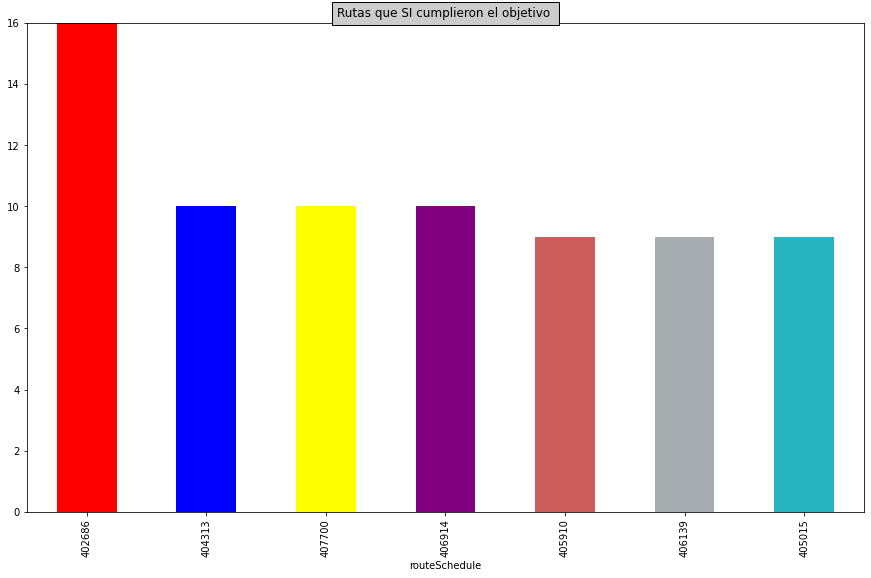

Porcentaje de  Rutas


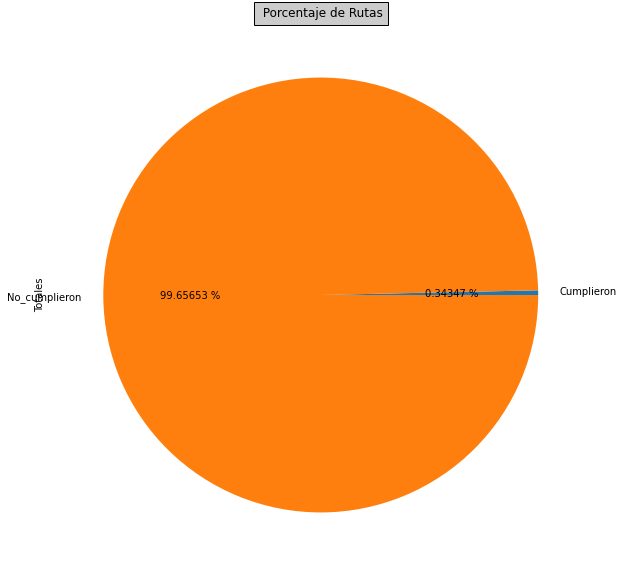

Fragmento de Rutas  que no cumplieron la regla de negocio
               idSchedul
routeSchedule           
414021                 6
410755                 6
414316                 6
408958                 6
409237                 6
412250                 6
405074                 6
411472                 6
409865                 6
409239                 7


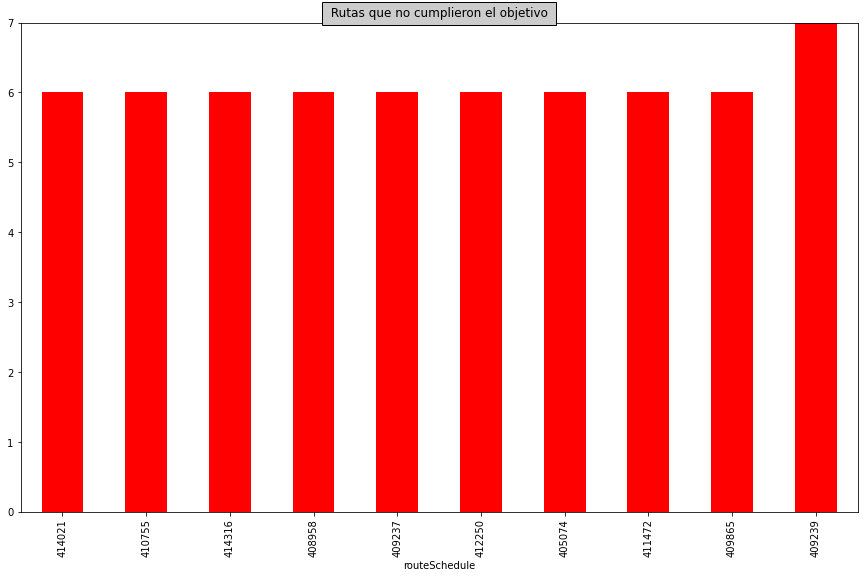

La cantidad total de visitas analizadas es:  idSchedul    2038
dtype: int64
La sumatoria total de visitas es:  idSchedul    4059
dtype: int64
El promedio de visitas entre las rutas analizadas:  idSchedul    1.991658
dtype: float64
la cantidad menor de visitas es de:  idSchedul    1
dtype: int64
la cantidad mayor de visitas es de:  idSchedul    16
dtype: int64
Valores totales por categoria
idSchedul_cat
Regular             1031
No Satisfactorio    1000
Excedente              4
Normal                 3
dtype: int64


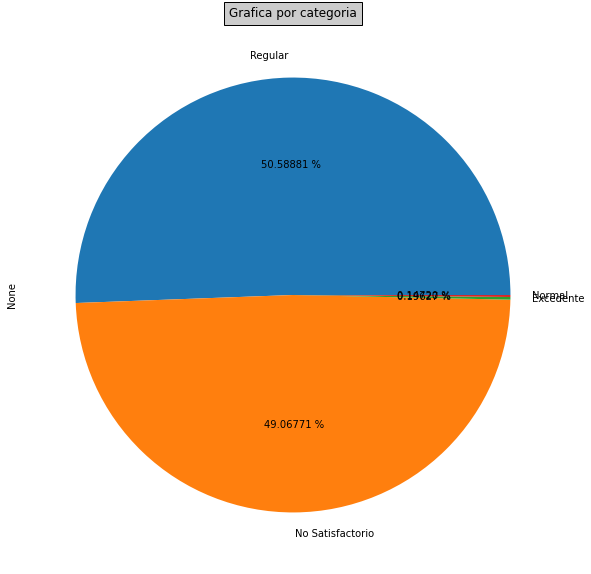

Ingrese la opcion a analizar:
        4-.Acompañamientos
        35.-Visita  a cliente
        0 - Salir
 0


In [72]:
#**********************************************************************************************
#****************************Logica del programa principal*************************************
#**********************************************************************************************
Salir=""

while(Salir!=0):
    
    #creamos una nueva instancia de la clase para iniciar el analisis
    ModeloV = ModeloVisita()
    
    #seleccionamos las opciones a analizar
    optionSelected, mesSelected, regla = cargarMenu()
    
    if optionSelected == 0:
        Salir=0
        break
    
    elif optionSelected != 4 and optionSelected != 35:
        print("Opcion incorrecta, por favor verifique!")
    
    else:
        #Iniciamos flujo de analisis normal
    
        #Seleccionamos el tipo de analisis
        ModeloV.tipoAnalisis = subMenu()

        #Completamos el resto de parametros de la clase
        ModeloV.mes = mesSelected
        ModeloV.reglaNegocio = regla
        ModeloV.tipoVisita = optionSelected
        
        #print("tipoAnalisis",ModeloV.tipoAnalisis )
        #print("mes",ModeloV.mes )
        #print("reglaNegocio",ModeloV.reglaNegocio )
        #print("tipoVisita",ModeloV.tipoVisita )
        #print("key",ModeloV.key )

        #Cargamos el archivo con los datos
        datos = ModeloV.cargarArchivo()

        if ModeloV.tipoAnalisis < 2 : #Analisis de visita por ruta/cliente (tipoAnalisis 1)
            if ModeloV.tipoVisita == 4:
                ModeloV.key = "routeSchedule"
            else:
                ModeloV.key = "customer"
        else:
            ModeloV.key = "employee"
            
        datosEspecificos = datos[[ModeloV.key, "idSchedul",]]

        datosFinales = datosEspecificos.groupby([ModeloV.key],as_index=True).count().sort_values(by='idSchedul',ascending=False)
            
        #Analisis final
        ModeloV.analizar(datosFinales)